Tarea III

AdvNNs

21 de noviembre de 2025

Resumen

El objetivo de esta tarea es cerrar el proyecto final. Por favor suba sus soluciones en un archivo comprimido a Classroom antes del 2 de diciembre.

Problema 1

Describa los siguientes puntos clave de su proyecto (puede agregar algunos gráficos a su respuesta):

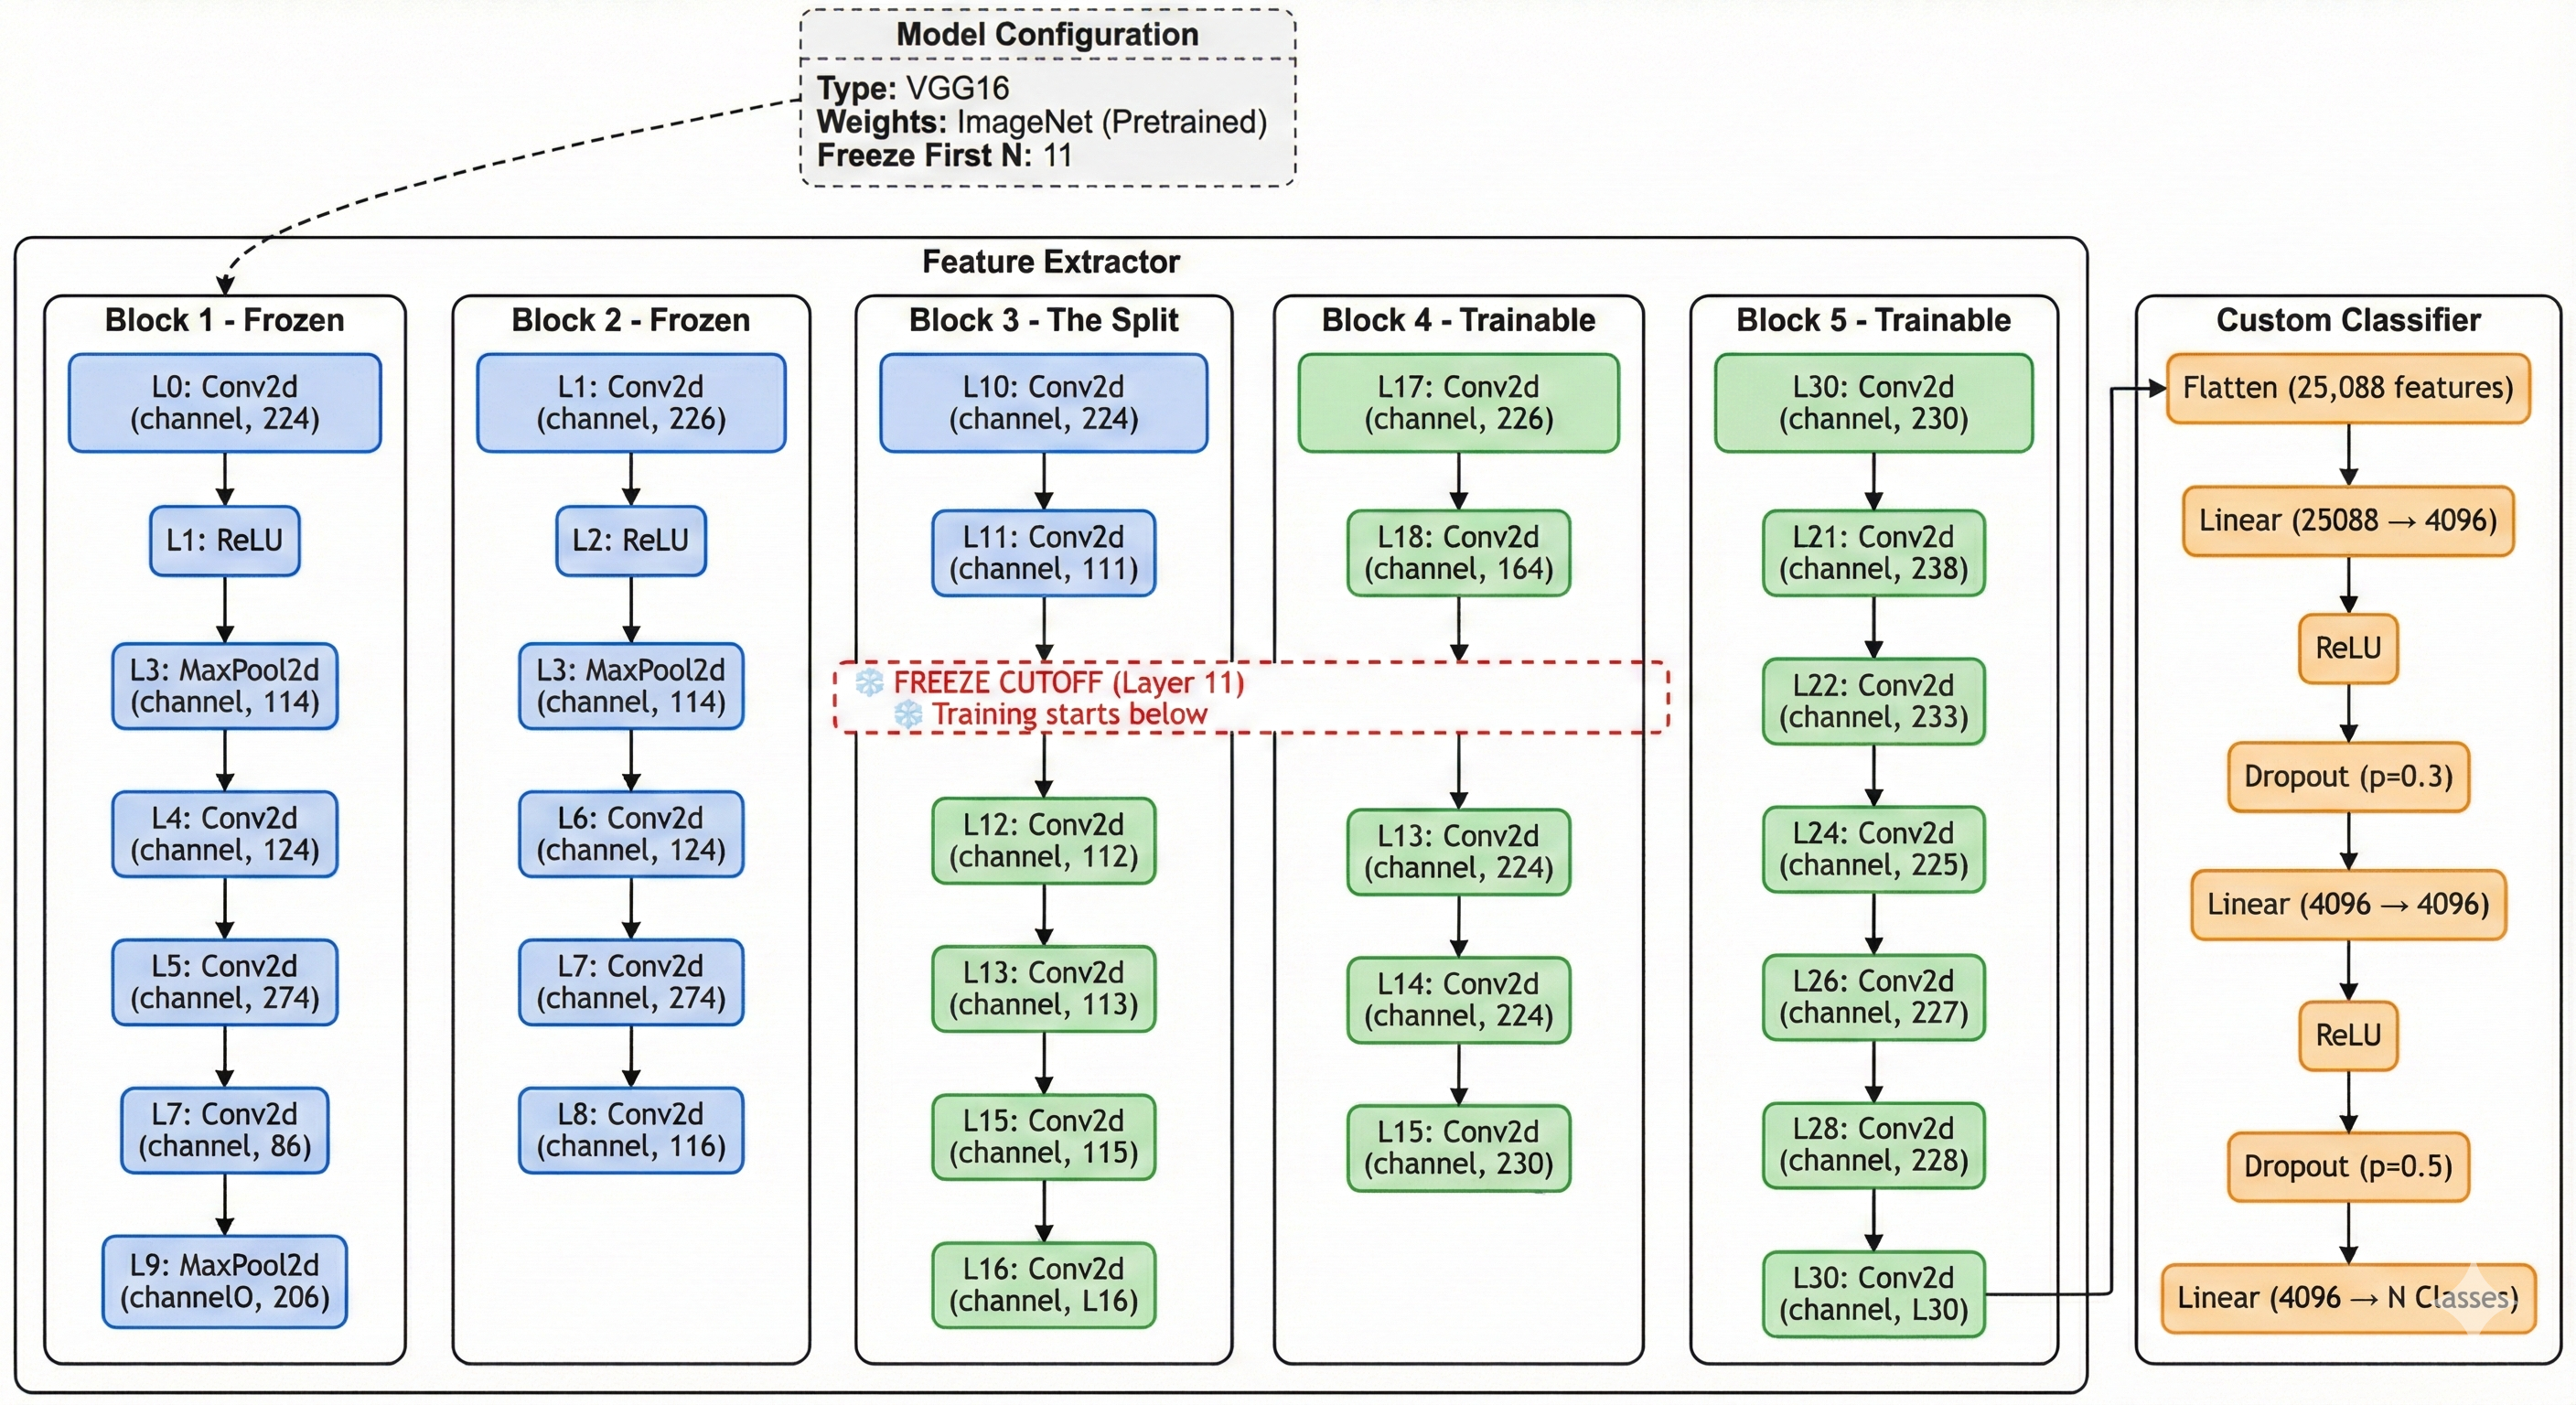

## a) 

Identifique qué tan bien funciona su modelo con sus datos. ¿Cuáles son los puntos fuertes de su modelo?

Basado en la configuración FREEZE_FIRST_N = 11, el modelo ha demostrado un desempeño sobresaliente con una Exactitud (Accuracy) Global del 91%.

La desición de congelaro los primeros 3 bloques o 11capas permite al modelo VGG16 conservar las caracteristicas aprendidas de IMAGENET (bodes, texturas, formas, etc) y adaptarlas a la nueva tarea de clasificación de deportes con un dataset relativamente pequeño. Esto resulta en una mejora significativa en la capacidad del modelo para reconocer patrones relevantes en las imágenes deportivas gracias al transfer learning aplicado.

Sus principales fortalezas incluyen:

    - Su peor desempeño (Weight Lifting, 85%) sigue siendo una puntuación alta
    - El modelo brilla en clases visualmente complejas como Ice Hockey (F1: 0.97) y Basketball (F1: 0.95).
    - La arquitectura del clasificador (Linear -> Drop(0.3) -> Linear -> Drop(0.5)) ha prevenido el overfitting a pesar de tener 134 millones de parámetros.

---

## b) 

¿Cuáles son las debilidades de su modelo? Haga un plan para tratarlas.

El problema principal radica en el tiempo de computación, ya que al tener cuna capa flatten de 25,088 neuronas conectadas a una densa de 4096 neuronas, el número de parámetros a entrenar es extremadamente alto (más de 100 millones solo en esa capa). Esto hace que el entrenamiento sea lento y requiera mucha memoria GPU.

El plan de acción sería:

- Reentrenar la cabecera usando técnicas de reducción de dimensionalidad como Global Average Pooling en lugar de Flatten, lo que reduciría drásticamente el número de parámetros y aceleraría el entrenamiento.

Otro punto importante es el tema de el Weight Lifting, que aunque tiene un F1 de 0.85, es la clase con peor desempeño. Esto se debe a que las imágenes de levantamiento de pesas son visualmente similares a otras clases como Gymnastics o Wrestling, lo que genera confusión en el modelo.

El plan de acción sería:

- Aumentar el dataset con más imágenes de Weight Lifting para mejorar la representación de esta clase.
- Hacer verificación manual de las imágenes para asegurar que no haya etiquetas erróneas o imágenes ambiguas.

---

## c) 

Imagine algunas posibles líneas de trabajo futuras aumentando la dificultad del problema. ¿Qué tan bien escalará su solución/modelo al escenario más complejo? ¿Cuáles son las posibles ventajas/desventajas de su modelo para ese caso?

Me parece que en terminos de escalabilidad, el modelo VGG16 tiene ciertas limitaciones debido a su arquitectura pesada y gran cantidad de parámetros. Si se aumenta la dificultad del problema, por ejemplo, clasificando más clases deportivas o utilizando imágenes con mayor variabilidad (diferentes ángulos, iluminación, fondos complejos), el modelo podría enfrentar una sobre cantidad de tiempos de entrenamiento y requerimientos computacionales elevados.

A largo plazo sería aumentar la potencia del hardware (GPUs más potentes o clusters de computación) para manejar el aumento en la complejidad del modelo y los datos.

El poder de inferencia sería muy lento para un usuario, con las tendencias actuales de la baja atención de las personas, un modelo que tarda mucho en responder puede ser contraproducente para una apliacación en tiempo real.

---

## d) 

Haga una revisión SOTA (estado del arte) sobre el problema que está resolviendo y el modelo que está utilizando. Identifique cómo otros artículos abordan el problema. ¿Qué tan original/útil es su propuesta en comparación?

Al día en temas de clasificación de imágenes, los modelos más avanzados ya no son de naturaleza CNN pura como VGG[1], si no, la visión por transformadores que funciona de forma que permite capturar relaciones espaciales más complejas en las imágenes. Modelos como ViT (Vision Transformer) y sus variantes han demostrado superar a las CNN tradicionales en varias tareas de visión por computadora, también hablas de EfficientNet[3] que optimiza la arquitectura para lograr un mejor rendimiento con menos parámetros.

El uso de transfer learning viene explicado en varios artículos[5], donde se demuestra que congelar las primeras capas de un modelo preentrenado en un dataset grande como ImageNet[6] permite aprovechar las características aprendidas y adaptarlas a nuevas tareas con datasets más pequeños, lo que mejora la eficiencia del entrenamiento y el rendimiento del modelo.

Quiza la ventaja del VGG es que la arquitectura en su compresión es relativamente simple y fácil de implementar. Lo que ResNet[4] y otros modelos más complejos pueden ser difíciles de entender.

Una desventaja es que no tiene skip connections como ResNet, lo que puede dificultar el entrenamiento de redes muy profundas debido al problema del gradiente desvanecido. Sin embargo si cuenta con IMAGENET como dataset preentrenado, lo que le da una ventaja significativa en términos de características aprendidas.

**[1] VGG16 (El modelo base)**

Simonyan, K., & Zisserman, A. (2014). Very deep convolutional networks for large-scale image recognition. arXiv preprint arXiv:1409.1556. (Este es el paper original que presentó VGG).

**[2] Vision Transformers (El nuevo estado del arte)**

Dosovitskiy, A., et al. (2020). An image is worth 16x16 words: Transformers for image recognition at scale. International Conference on Learning Representations (ICLR).

**[3] EfficientNet (Eficiencia y parámetros)**

Tan, M., & Le, Q. (2019). EfficientNet: Rethinking model scaling for convolutional neural networks. International Conference on Machine Learning (ICML), 6105-6114.

**[4] ResNet (Skip connections y Vanishing Gradient)**
He, K., Zhang, X., Ren, S., & Sun, J. (2016). Deep residual learning for image recognition. Proceedings of the IEEE conference on computer vision and pattern recognition (CVPR), 770-778.

**[5] Transfer Learning (Por qué funciona congelar capas)**

Yosinski, J., Clune, J., Bengio, Y., & Lipson, H. (2014). How transferable are features in deep neural networks? Advances in neural information processing systems (NeurIPS)

**[6] ImageNet (El dataset de los pesos)**

Deng, J., Dong, W., Socher, R., Li, L. J., Li, K., & Fei-Fei, L. (2009). ImageNet: A large-scale hierarchical image database. IEEE Conference on Computer Vision and Pattern Recognition, 248-255.

Problema 2

Haga un resumen breve de su problema completo, conjunto de datos y modelo, así como los mejores resultados y todas las acciones/decisiones/suposiciones que tomó.